In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

**Метод пристрелки**

In [ ]:
def f(x, y):
  return np.array([
                   y[1],
                   -(x**2 - 3)*y[1] - (x**2 - 3)*math.cos(x)*y[0] + 2 - 6*x + 2*x**3 + (x**2 - 3)*math.exp(x)*(1 + math.cos(x)) + math.cos(x)*(math.exp(x) - 1 + x**4 - 2*x**2)
                  ])

In [ ]:
a = 0
b = math.pi

In [ ]:
ya = 0
yb = math.pi**2
eps = 1e-6

In [ ]:
tau = 0.01

In [ ]:
def rk_solve(a, b, h, y0):

  n = int(np.ceil((b-a)/h))
  t = np.linspace(a, b, num=n)

  y = np.array([np.zeros(n) for i in range(len(y0))])
  y[:, 0] = y0

  k = np.array([np.zeros(4) for i in range(len(y0))])

  for i in range(n - 1):

    k[:, 0] = f(t[i], y[:, i])
    k[:, 1] = 2 * f(t[i] + h/2, y[:, i] + h/2 * k[:, 0])
    k[:, 2] = 2 * f(t[i] + h/2, y[:, i] + h/2 * k[:, 1])
    k[:, 3] = f(t[i] + h, y[:, i] + h * k[:, 2])

    y[:, i+1] = y[:, i] + 1/6 * h * np.sum(k, axis=1)

  return t, y

In [ ]:
err = lambda y: y - yb

In [ ]:
def optimise(a1, a2):
  t, [y, vy] = rk_solve(a, b, tau, [ya, a1])
  prev1 = err(y[-1])
  t, [y, vy] = rk_solve(a, b, tau, [ya, a2])
  prev2 = err(y[-1])

  a3 = 0
  while (np.abs(err(y[-1]))) > eps:
    a3 = (a1 + a2)/2
    t, [y, vy] = rk_solve(a, b, tau, [ya, a3])
    cur = err(y[-1])
    if cur * prev1 < 0:
      prev2 = cur 
      a2 = a3
    else:
      prev1 = cur 
      a1 = a3

  return t, y, a3

In [ ]:
 a1 = 3
 t, [y, vy] = rk_solve(a, b, tau, [ya, a1])
 prev1 = err(y[-1])
 print(prev1)

137.40585898619088


In [ ]:
 a2 = 0
 t, [y, vy] = rk_solve(a, b, tau, [ya, a2])
 prev2 = err(y[-1])
 print(prev2)

-247.59928222164316


In [ ]:
x, y, alpha = optimise(a1, a2)
print(y[-1])
print(alpha)

9.86960436931842
1.9293192923069


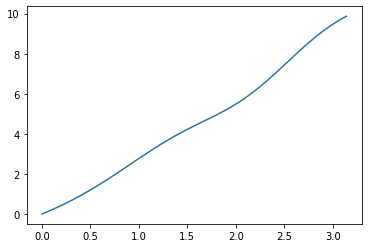

In [ ]:
plt.plot(x, y)

In [ ]:
def find_val(x, y, point):
  dat = {'x': x, 'y': y}
  df = pd.DataFrame(data=dat)

  return df.iloc[(df['x']-point).abs().argsort()[:1]]

In [ ]:
for i in [0.5, 1, 1.5, 2, 2.5, 3]:
  print(find_val(x, y, i))

           x        y
50  0.500254  1.19911
            x         y
100  1.000507  2.769559
            x         y
150  1.500761  4.224841
            x         y
200  2.001014  5.484949
            x         y
250  2.501268  7.438121
            x         y
300  3.001522  9.473135


**Метод прогонки**

In [ ]:
def generate_grid(a, b, h):
  n = int(np.ceil((b - a)/h))
  return np.linspace(a, b, num=n)

In [ ]:
gn = lambda x: x**2 - 3
hn = lambda x: (x**2 - 3)*np.cos(x)
fn = lambda x: 2 - 6*x + 2*x**3 + (x**2 - 3)*np.exp(x)*np.sin(x)*(1 + np.cos(x)) + np.cos(x) * (np.exp(x) - 1 + x**4 - 2*x**2)

In [ ]:
a = 0
b = math.pi

In [ ]:
ya = 0
yb = math.pi**2

In [ ]:
tau = 0.01

In [ ]:
x = generate_grid(a, b, tau)

In [ ]:
an = lambda x, h: 1 + gn(x)*h
bn = lambda x, h: -2 - gn(x)*h + h**2 * hn(x)
cn = 1
dn = lambda x, h: h**2 * fn(x)

In [ ]:
def my_solver(a, b, c, d):
    n = len(d)
    
    x = np.zeros(n)
    p = np.zeros(n)
    q = np.zeros(n)
    
    p[1] = -c[0]/b[0]
    q[1] = d[0]/b[0]
    
    for i in range(1, n-1):
        p[i+1] = -c[i]/(a[i]*p[i] + b[i])
        q[i+1] = (d[i] - a[i]*q[i])/(a[i]*p[i] + b[i])
    x[n-1] = (d[n-1] - a[n-1]*q[n-1])/(p[n-1]*a[n-1] + b[n-1])
    
    for i in range(n-2, -1, -1):
        x[i] = x[i+1]*p[i+1] + q[i+1]
        
    return x

In [ ]:
n = int(np.ceil((b - a)/tau))
print(n)
print(len(x))

315
315


In [ ]:
a = [0] + [an(x[i], tau) for i in range(1, n-1)] + [0]
b = [1] + [bn(x[i], tau) for i in range(1, n-1)] + [1]
c = [0] + [cn for i in range(1, n-1)] + [0]
d = [ya] + [dn(x[i], tau) for i in range(1, n-1)] + [yb]
print(len(a))
print(len(b))
print(len(c))
print(len(d))

315
315
315
315


In [ ]:
y = my_solver(a, b, c, d)

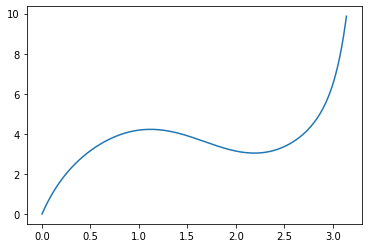

In [ ]:
plt.plot(x, y)

In [ ]:
for i in [0.5, 1, 1.5, 2, 2.5, 3]:
  print(find_val(x, y, i))

           x         y
50  0.500254  3.159589
            x         y
100  1.000507  4.184467
            x         y
150  1.500761  3.899702
            x         y
200  2.001014  3.137254
            x         y
250  2.501268  3.361952
            x         y
300  3.001522  6.480457


In [ ]:
A = np.zeros((n, n))
for i in range(n):
  for j in range(n):
    if j == i:
      A[i, j] = b[i]
    if j == i+1:
      A[i, j] = c[i]
    if j == i-1:
      A[i, j] = a[i]

In [ ]:
y = np.linalg.solve(A, d)

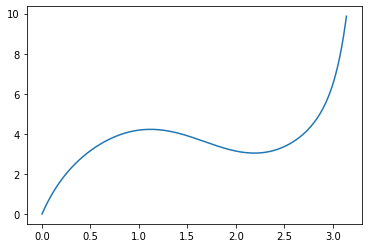

In [ ]:
plt.plot(x, y)